# Homework 4. Frequent Words and Web scraping

***Double Click here to edit this cell***

- Name: 김현동
- Student ID: 201901208
- Submission date: 2023-05-19

## Problem 1 (15 pts)

- Project Gutenberg is a volunteer effort to digitize and archive cultural works.
- Moby-Dick is an 1851 novel by American writer Herman Melville.
- You can find Moby-Dick in an ordinary text format at https://www.gutenberg.org/files/2701/old/moby10b.txt
- Use **requests** module to get the text.


- We want to compute word frequency of words appearing in mobydick and generate WordCloud
    - First, you must split the text into words.
    - **Any symbols(!, ., ?, ,, +, -, *, ...)** are delimeters
    - Numbers should not be words.
    - Null string is not a word.
    - Any delimiters should not be words.
    - To split into words, use **re** (regular expression module)
    - (Upper or lower) Cases does not matter in words

### 1.1 Print top 50 most common words (5 pts)

In [ ]:
from collections import Counter
import requests, re
# YOUR CODE MUST BE HERE
url ="https://www.gutenberg.org/files/2701/old/moby10b.txt"
text_data = requests.get(url).text
words = re.findall(r'\b[A-Za-z]+\b', text_data)
words = [word.lower() for word in words]
counter = Counter(words)
sorted_counter = sorted(counter.items(), key=lambda x: x[1], reverse=True)
print(sorted_counter)

[('the', 14512), ('of', 6676), ('and', 6471), ('a', 4774), ('to', 4690), ('in', 4190), ('that', 3095), ('it', 2542), ('his', 2530), ('i', 2128), ('he', 1896), ('but', 1823), ('s', 1811), ('as', 1750), ('is', 1748), ('with', 1729), ('was', 1647), ('for', 1643), ('all', 1537), ('this', 1437), ('at', 1332), ('by', 1232), ('whale', 1228), ('not', 1162), ('from', 1103), ('on', 1077), ('so', 1073), ('him', 1067), ('be', 1058), ('you', 949), ('one', 934), ('there', 870), ('now', 787), ('had', 779), ('have', 773), ('or', 761), ('were', 685), ('they', 669), ('which', 650), ('like', 648), ('me', 634), ('then', 632), ('some', 621), ('what', 620), ('their', 620), ('are', 611), ('when', 608), ('an', 600), ('no', 592), ('my', 589), ('upon', 566), ('out', 538), ('man', 527), ('into', 524), ('up', 523), ('ship', 518), ('more', 513), ('ahab', 511), ('if', 503), ('we', 477), ('them', 474), ('ye', 472), ('sea', 455), ('old', 450), ('other', 433), ('would', 433), ('been', 415), ('over', 411), ('these', 41

 **Your output should be like the following**:
 ```python
[('the', 14512), ('of', 6676), ('and', 6471), ('a', 4774), ('to', 4690), ('in', 4190), ('that', 3095), ('it', 2542), ('his', 2530), ('i', 2128), ('he', 1896), ('but', 1823), ('s', 1811), ('as', 1750), ('is', 1748), ('with', 1729), ('was', 1647), ('for', 1643), ('all', 1537), ('this', 1437), ('at', 1332), ('by', 1232), ('whale', 1228), ('not', 1162), ('from', 1103), ('on', 1077), ('so', 1073), ('him', 1067), ('be', 1058), ('you', 949), ('one', 934), ('there', 870), ('now', 787), ('had', 779), ('have', 773), ('or', 761), ('were', 685), ('they', 669), ('which', 650), ('like', 648), ('me', 634), ('then', 632), ('some', 621), ('what', 620), ('their', 620), ('are', 611), ('when', 608), ('an', 600), ('no', 592), ('my', 589)]
```

### 1.2 Plot word frequency (5 pts)

- Sort the word frequency in descending order
- Plot the word frequency
- Plot the word frequency in log-log plot.

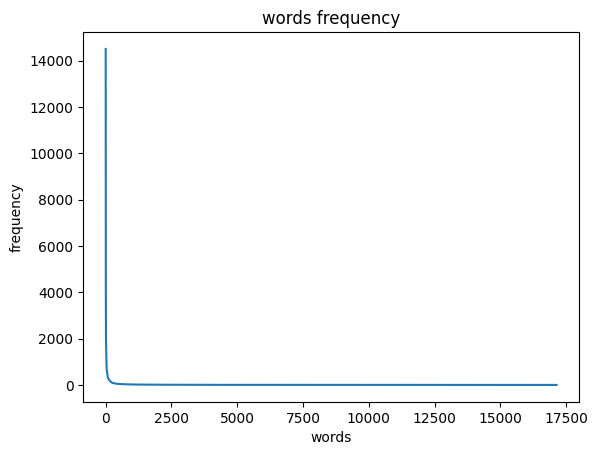

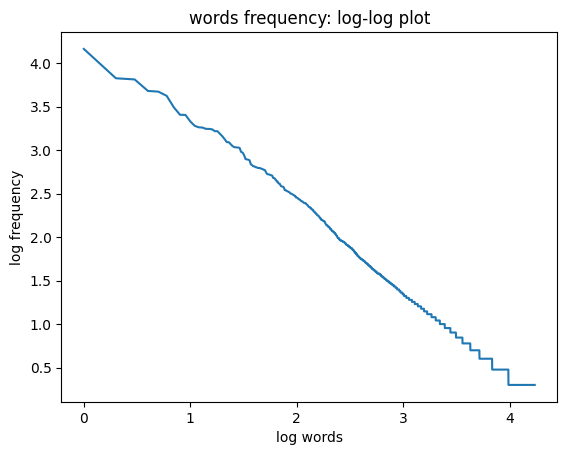

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
# YOUR CODE MUST BE HERE
sortedWords, sortedCounts = zip(*sorted_counter)
indexes = np.arange(len(sortedWords))
words_counts = np.array(sortedCounts)

plt.title("words frequency")
plt.xlabel("words")
plt.ylabel("frequency")

plt.plot(indexes,words_counts)

plt.show()

npX = np.log10(indexes+1)
npY = np.log10(words_counts+1)

plt.title("words frequency: log-log plot")
plt.xlabel("log words")
plt.ylabel("log frequency")
plt.plot(npX,npY)

**Your output should be like**:
![image.png](attachment:image.png)



![image.png](attachment:image.png)

### Discussion

- Read this wikipedia article : https://ko.wikipedia.org/wiki/%EC%A7%80%ED%94%84%EC%9D%98_%EB%B2%95%EC%B9%99)
- Discuss what you learned from the distribution.


```
WRITE HERE (To edit, double click this cell)
사람의 대화, 글에서 특히 자주 등장하는 단어가 존재한다.
f(r) ≈ K / r의 수학적 관계, 다음으로 빈번한 단어의 등장 빈도의 역수와 비례한다는 것을 봤을때,
첫번째와 두번째, 그리고 세번째와 많은 빈도수 차이를 보일 수 있음을 알 수 있다.
일상생활. 즉 대화 및 글에서는 상위 단어들이 주요한 역할을 한다는 것을 알 수 있는 반면,
데이터 측면에서는 분석 및 모델링에서 노이즈로 작용 할 수 있다는 내용을 포함한다.
전처리를 요구하며 이를 활용하여 텍스트 데이터의 특성을 파악하고 분석하는 데 활용할 수 있다.

```


### 1.3 Word Cloud (5 pts)

- Print top 10 most words except stop words
- Draw word cloud of top 10 most common words
- Googling for how to draw word clouds

**Your output should be like**:
```python
[('whale', 1228), ('one', 934), ('like', 648), ('upon', 566), ('man', 527), ('ship', 518), ('ahab', 511), ('ye', 472), ('sea', 455), ('old', 450)]
```
**Your output should be like this (but NOT exactly the the same)**:
![image.png](attachment:image.png)

- The following is English stop words list

In [ ]:
stopwords = {'it', 'than', 'out', 'an', 'at', 'until', 'wouldn', 'too', 'each', 'off', 'whom', 'not', 'ain', 'weren', "you've", 'isn', 've', "that'll", 'didn', 'couldn', 'with', 'for', 'me', "shouldn't", 'those', 'once', 'them', 'him', 'again', 'what', 'to', 's', 'don', 'yourselves', "she's", 'd', 'we', 'so', 'does', 'your', 'is', 'such', 'hasn', 'doesn', "doesn't", 'no', 'll', 'their', 'before', 'my', 'being', 'and', 'but', 'below', 'won', "don't", 't', 'myself', 'very', 'why', "mustn't", 'that', 'been', 'you', "you'd", 'few', 'other', 'ma', 'any', 'having', 'against', 'into', 'on', 'just', 'herself', "hadn't", "mightn't", 'aren', "wouldn't", 'ours', 'about', 'then', 'mustn', 'i', 'y', 'should', 'all', 'while', 'himself', 'do', 'up', 'were', 'this', 'most', 'when', 'nor', 'from', 'hadn', 'theirs', 'she', 'be', 'under', 'or', 'will', 'through', 'our', "isn't", 'as', 'between', 'had', 'more', "aren't", "weren't", 'if', 'the', 'am', 'how', 'both', "you're", 'yourself', "couldn't", 'only', 'in', 'itself', 'own', "it's", 'because', 'some', "didn't", 'wasn', 'shan', "hasn't", 'mightn', 'shouldn', 'here', 'he', 'where', 'm', 're', 'was', 'after', 'has', 'same', "shan't", 'further', "wasn't", 'down', 'yours', "should've", 'now', "needn't", 'above', 'haven', 'its', 'who', 'of', 'ourselves', 'did', 'these', 'there', 'his', "haven't", "won't", 'themselves', "you'll", 'a', 'are', 'which', 'have', 'by', 'during', 'can', 'hers', 'over', 'her', 'doing', 'o', 'needn', 'they'}

[('whale', 1228), ('one', 934), ('like', 648), ('upon', 566), ('man', 527), ('ship', 518), ('ahab', 511), ('ye', 472), ('sea', 455), ('old', 450)]


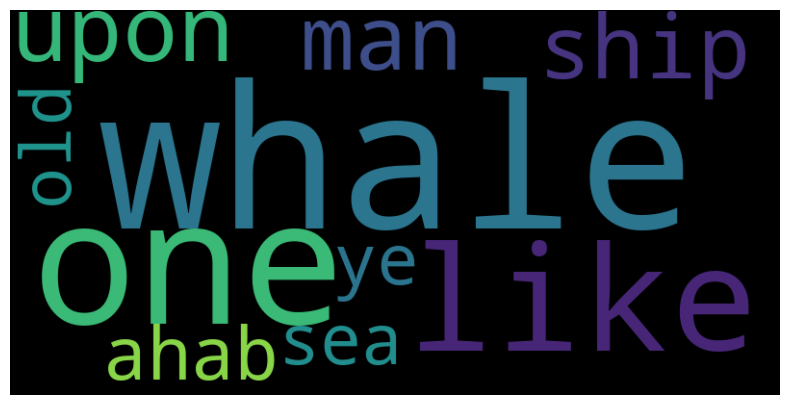

In [ ]:
# YOUR CODE MUST BE HERE

from wordcloud import WordCloud

words_filtered = [word.lower() for word in words if word.lower() not in stopwords]
counter_filtered = Counter(words_filtered)
sorted_counter_filtered = sorted(counter_filtered.items(), key=lambda x: x[1], reverse=True)
print(sorted_counter_filtered[:10])
wordcloud = WordCloud(width=800, height=400, background_color='black',max_words=10).generate_from_frequencies(dict(sorted_counter_filtered))

# Display the WordCloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

## Problem 2 (20 pts)

- We want to find how many CS faculty members at CS department of Stanford Univ work on CS research areas.
- First, visit https://cs.stanford.edu/research
- Take a look at the source html of the web page.
- We want to scrape data on all the faculty members
- Run the following two cells and see what happens
- If necessary, install html5lib

In [ ]:
from bs4 import BeautifulSoup
import requests

url = "https://cs.stanford.edu/research?items_per_page=All&field_faculty_status_value=active"
# soup = BeautifulSoup(requests.get(url).text, 'html5lib')

html_content=requests.get(url).text
with open("stanford_cs.txt","w",encoding="utf-8") as file:
  file.write(html_content)

In [ ]:
f = open("stanford_cs.txt", "r")
text = f.read()
soup = BeautifulSoup(text, 'html5lib')

## Remark

- Stanford Univ에 너무 많이 접속해서 (DDOS처럼 여겨져서) 접속이 막힐 수도 있음
- 해당 웹페이지를 처음 접속해서 파일로 저장한 다음,
- 파일로 부터 읽어서 숙제를 테스트하는 게 필요함.




### 숙제 제출시 아래 cell은 절대 실행하지(출력에 포함하지) 말 것!!!

In [ ]:
# print(soup.tbody.prettify())

### Draw bar charts on research area contributions of Stanford CS faculty

- For each research area, we want to compute how many professors works on that area.
- If one professor works on n research fields, the contribution to one research field is 1/n.
- The colors for professor ranks (assistant, associate, full professors) may be your own choice.
- Your output should be like:

![image-3.png](attachment:image-3.png)

Text(0.5, 0, 'Research Area')

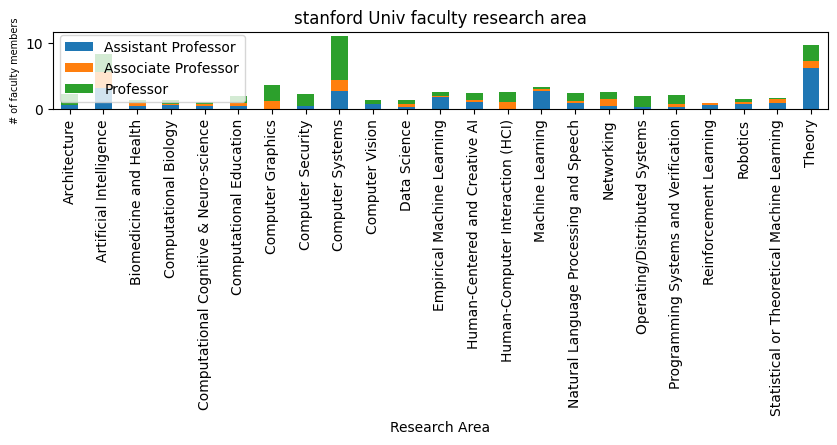

In [ ]:
research_areas = {}
professors = soup.find_all('tr')
for professor in professors:
  research_focus_elem = professor.find('td', class_="views-field views-field-field-research-focus fac_prof_view_focus")
  professor_rank_elem = professor.find('td', class_="views-field views-field-field-faculty-title fac_prof_view_title")

  if research_focus_elem is not None:
    research_focus_text = research_focus_elem.get_text(strip=True,separator=",")
    research_focus_list = research_focus_text.split(",")

  if professor_rank_elem is not None:
    professor_rank = professor_rank_elem.get_text(strip=True)

  if(professor_rank=='Assistant Professor' or professor_rank=='Associate Professor' or professor_rank== 'Professor'):
    pass
  else: continue

  for research_focus in research_focus_list:
    p = 1/len(research_focus_list)
    if research_focus not in research_areas:
      research_areas[research_focus]={'Assistant Professor':0, 'Associate Professor':0, 'Professor':0}
    research_areas[research_focus][professor_rank] += p

sorted_keys = sorted(research_areas.keys())

sorted_keys = sorted(research_areas.keys())
pd_data=pd.DataFrame(research_areas).T
pd_data = pd_data.loc[sorted_keys]

pd_data.plot(kind="bar",figsize=(10,1),stacked=True)
# plt.xticks(fontsize=6)
plt.title('stanford Univ faculty research area')
plt.ylabel('# of faculty members', fontsize=7)
plt.xlabel('Research Area')

## Ethics:
If you cheat, you will get negatgive of the total points.
If the homework total is 22 and you cheat, you get -22.

## What to submit


- Run **all cells** after restarting the kernel
- Goto "File -> Print Preview"
- Print the page as pdf
- Pdf file name must be in a form of: homework_4_홍길동_202300001.pdf
- Submit the pdf file in google classroom
- No late homeworks will be accepted
- Your homework will be graded on the basis of correctness, performance, and programming skills
- Your homework will be graded on the basis of correctness and programming skills